# Tutorial 3
# Decision Trees and Random Forest

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier       # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

## Loading Data
### The data file diabetes.csv is available on Moodle
https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [2]:
# Define the labels for the diabetes datafile
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)
# change the path of C drive where you have downsloaded your "pima-indians-diabetes.csv"

In [3]:
# Display the first 5 records
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Check missing/ null values in variables
pima.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

## Feature Selection

In [5]:
# split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]               # Features of the dataset
y = pima.label                       # Target variable of the dataset

# Display the X and y arrays
print(X, y)

     pregnant  insulin   bmi  age  glucose  bp  pedigree
0           6        0  33.6   50      148  72     0.627
1           1        0  26.6   31       85  66     0.351
2           8        0  23.3   32      183  64     0.672
3           1       94  28.1   21       89  66     0.167
4           0      168  43.1   33      137  40     2.288
..        ...      ...   ...  ...      ...  ..       ...
763        10      180  32.9   63      101  76     0.171
764         2        0  36.8   27      122  70     0.340
765         5      112  26.2   30      121  72     0.245
766         1        0  30.1   47      126  60     0.349
767         1        0  30.4   23       93  70     0.315

[768 rows x 7 columns] 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64


## Splitting Data

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) # 70% training and 30% test

## Building Decision Tree Model

In [8]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 4, random_state = 0) # criterion='gini' or 'entropy'

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Evaluating Model

In [9]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.7705627705627706
Accuracy: 0.77


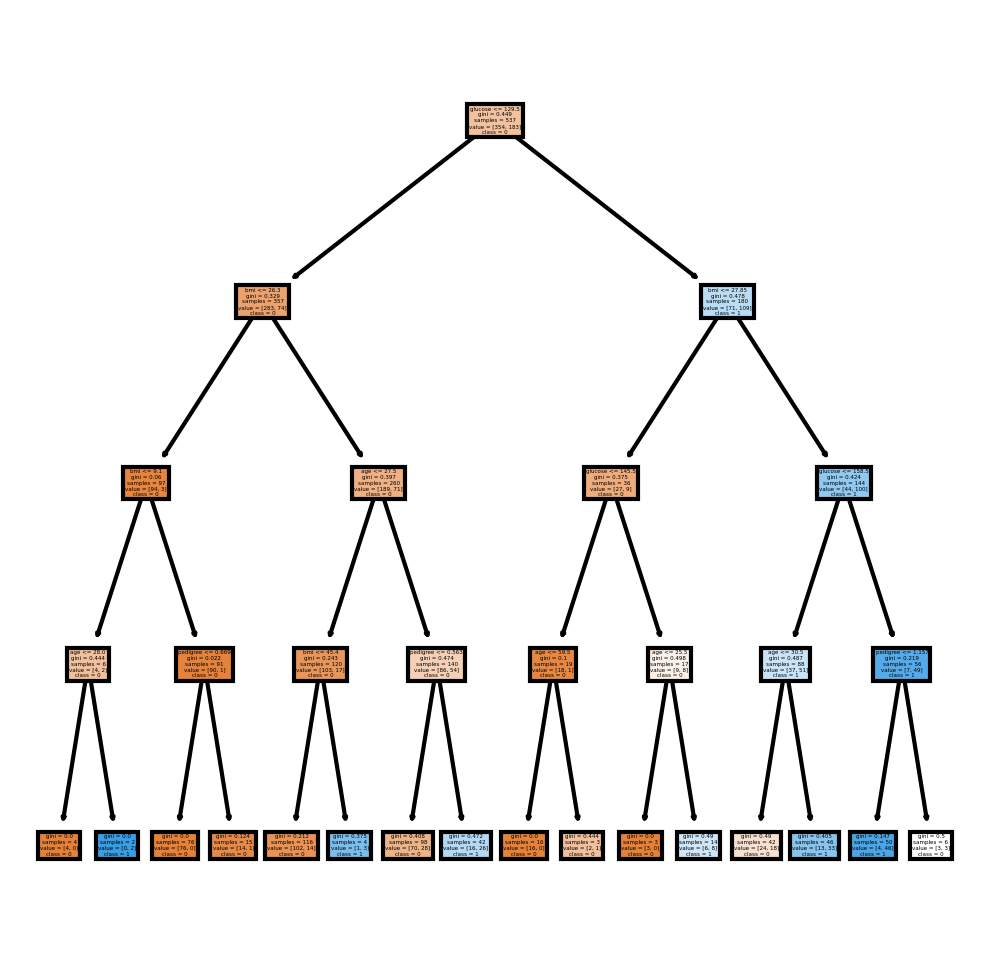

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# column names for dataset
fn = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
# classes of dataset
cn = ['0','1']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)

tree.plot_tree(clf,
           feature_names = fn, 
           class_names = cn,
           filled = True);
# In case of any errors, install conda install python-graphviz     on the command line

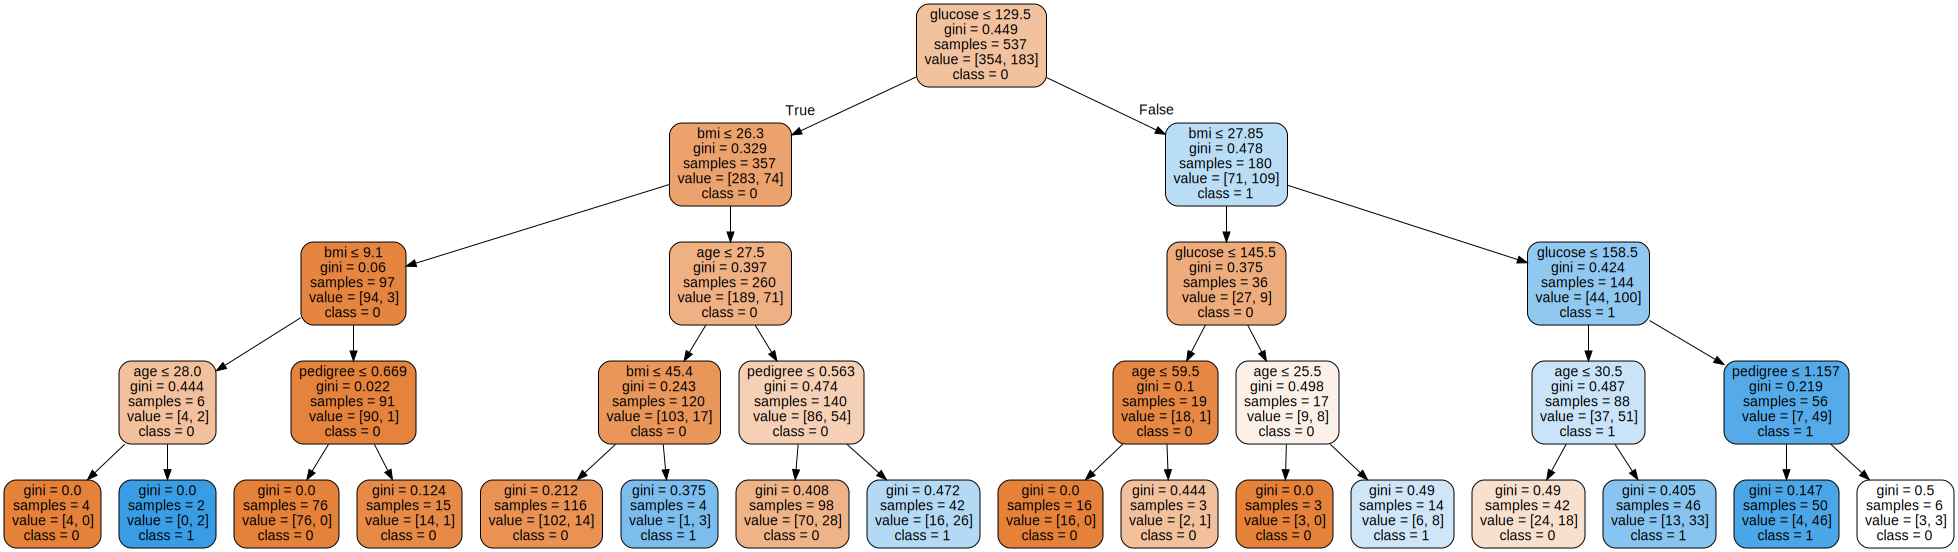

In [11]:
# Use the below command on anconda navigator 
# conda install -c anaconda python-graphviz
from sklearn.tree import export_graphviz
import graphviz 

# Create an object named as 'dot_data_oima' by calling a method 'export_graphviz'
dot_data_pima = export_graphviz(clf, out_file = None, 
                                feature_names = fn,  
                                class_names = cn,  
                                filled = True, rounded = True,  
                                special_characters = True)

graph = graphviz.Source(dot_data_pima) 
graph 

## Use Iris dataset to classify the records of iris data set.
The details of this data set are available at the following link: https://archive.ics.uci.edu/ml/datasets/iris. The features of the data set are mentioned below
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. <b>class</b>: Iris Setosa, Iris Versicolour and Iris Virginica

In [12]:
from sklearn.datasets import load_iris
from sklearn import tree

# Assign column names for iris dataset
fn_iris = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']

# Assign classes of iris dataset, 0: Iris Setosa, 1: Iris Versicolour, 2: Iris Virginica
cn_iris = ['0', '1', '2']

# Load the iris data set into 'iris' array
iris = load_iris()

X = iris.data
y = iris.target

# Create a classification object by calling a method (DecisionTreeClassifier())
clf_iris = DecisionTreeClassifier()

# Train the decision tree model by calling a fit() method
clf_iris = clf_iris.fit(X, y)

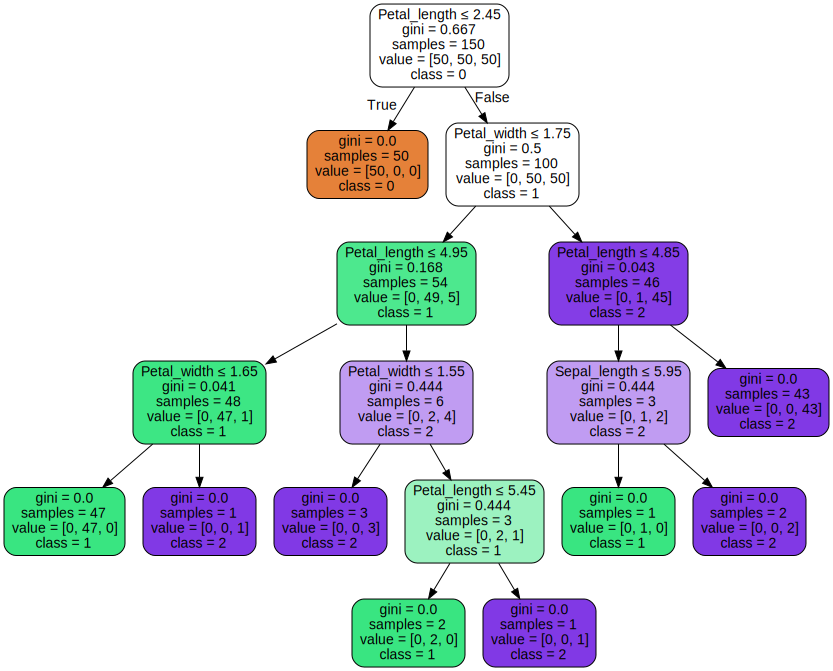

In [13]:
# import the library graphviz
import graphviz 

# Create an object named as 'dot_data_iris' by calling a method 'export_graphviz'
dot_data_iris = export_graphviz(clf_iris, out_file = None, 
                                feature_names = fn_iris,  
                                class_names = cn_iris,  
                                filled = True, rounded = True,  
                                special_characters = True)

graph = graphviz.Source(dot_data_iris) 
graph

In [14]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=f8004504261db70e952c2212b1fffc1b5119700c6cf21083c22afcb6b48bd0d4
  Stored in directory: c:\users\ferre\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install six

Note: you may need to restart the kernel to use updated packages.


## Optimizing Decision Tree Performance
### criterion : optional (default=”gini”)
Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

## splitter : string, optional (default=”best”) or Split Strategy:¶
This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

## max_depth : int or None, optional (default=None) or Maximum Depth of a Tree:
The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting.

In [16]:
# Create Decision Tree classifer object
clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)

# Train Decision Tree Classifer
clf_entropy = clf_entropy.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf_entropy.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


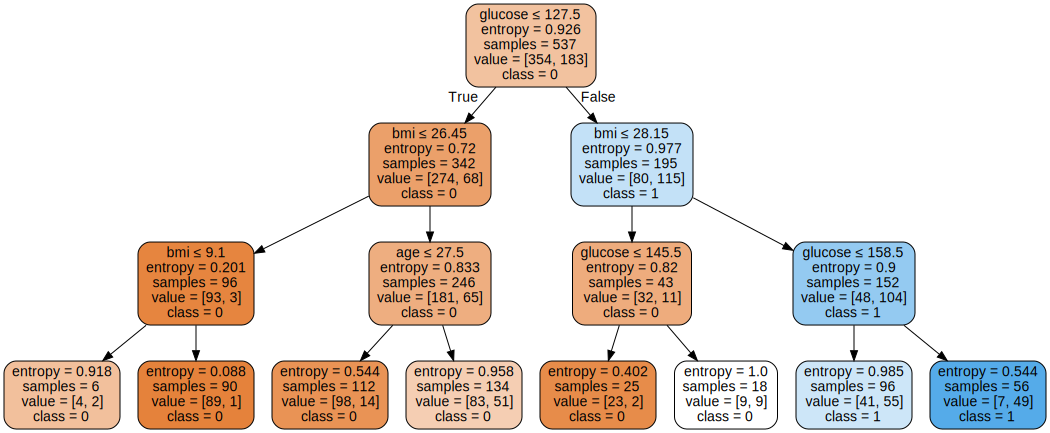

In [17]:
import graphviz 
from sklearn.tree import export_graphviz

# column names for dataset
fn=['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

# classes of dataset
cn=['0','1']

# Create an object named as 'dot_data_oima' by calling a method 'export_graphviz'
dot_data_pima_entropy = export_graphviz(clf_entropy, out_file = None, 
                                feature_names = fn,  
                                class_names = cn,  
                                filled = True, rounded = True,  
                                special_characters = True)

graph = graphviz.Source(dot_data_pima_entropy) 
graph 

# Task 1: 
Consider the dataset (car_evaluation.csv) available on Moodle to apply DecisionTreeClassifier and show the decision tree upto level 4. The categorical data is present in the car_evaluation.csv dataset, use <b>category_encoders library </b> to convert categorical data into continuous data. Classify the cars using 'gini index' based on their conditions such as unacceptable (unacc), acceptable (acc), good and very good using Decision Tree machine learning model.

# Random Forest
We are building a model on the iris flower dataset, which is a very famous classification set. It comprises the sepal length, sepal width, petal length, petal width, and type of flowers. There are three species or classes: setosa, versicolor, and virginia. We build a model to classify the type of flower. The dataset is available in the scikit-learn library or we can download it from the UCI Machine Learning Repository.

Start by importing the datasets library from scikit-learn, and load the iris dataset with load_iris().

In [18]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

In [19]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [20]:
# print the iris data (top 5 records)
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [22]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data = pd.DataFrame({
                    'sepal length':iris.data[:, 0],
                    'sepal width':iris.data[:, 1],
                    'petal length':iris.data[:, 2],
                    'petal width':iris.data[:, 3],
                    'species':iris.target
                    })
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y = data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 5) # 70% training and 30% test

In [27]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_RF = RandomForestClassifier(n_estimators = 1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

In [25]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.9555555555555556
Accuracy: 0.96


We can also make a prediction for a single item, for example:
#### sepal length = 3
#### sepal width = 5
#### petal length = 4
#### petal width = 2
Now you can predict which type of flower it is.

In [26]:
clf_RF.predict([[3, 5, 4, 2]])

array([2])

This shows that the 2 indicates the flower type Virginica.

## Finding Important Features in Scikit-learn
We are finding important features or selecting features in the IRIS dataset. In scikit-learn, you can perform this task in the following steps:
1. First, you need to create a random forests model.
2. Second, use the feature importance variable to see feature importance scores.
3. Third, visualize these scores using the seaborn library.

In [29]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_RF = RandomForestClassifier(n_estimators = 100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF.fit(X_train ,y_train)

RandomForestClassifier()

In [33]:
clf_RF.feature_importances_

array([0.0977015 , 0.02473519, 0.41291121, 0.46465209])

In [34]:
import pandas as pd
feature_imp = pd.Series(clf_RF.feature_importances_, index = iris.feature_names).sort_values(ascending = False)
feature_imp

petal width (cm)     0.464652
petal length (cm)    0.412911
sepal length (cm)    0.097702
sepal width (cm)     0.024735
dtype: float64

We can visualize the feature importance. Visualizations are easy to understand and interpretable.

For visualization, we can use a combination of matplotlib and seaborn. Because seaborn is built on top of matplotlib, it offers a number of customized themes and provides additional plot types. Matplotlib is a superset of seaborn and both are equally important for good visualizations.

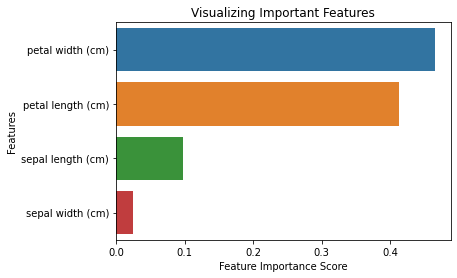

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Generating the Model on Selected Features
We can remove the "sepal width" feature because it has very low importance, and select the 3 remaining features.

In [36]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into features and labels
X = data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal length"

# y is called as the target variable
y = data['species']                                       

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state = 5) # 70% training and 30% test

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
clf_RF1 = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF1.fit(X_train,y_train)

# prediction on test set
y_pred = clf_RF1.predict(X_test)

In [30]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.9523809523809523
Accuracy: 0.95


Therefore, we can see that after removing the least important features (sepal length), the accuracy increased. This is because you removed misleading data and noise, resulting in an increased accuracy. A lesser amount of features also reduces the training time.

## Reference: 
1. https://www.datacamp.com/community/tutorials/random-forests-classifier-python
2. https://www.datacamp.com/community/tutorials/decision-tree-classification-python